**Fake data generator**

Testing ~Minuit (from iminuit)~ `lmfit` 's least square fit method, for LeastSquare minimization cost function

In [1]:
%config InlineBackend.figure_format='retina'


from iminuit import cost, Minuit
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


N=int(10)

s = np.logspace(3,6,N)
s1=np.logspace(3,6,int(N*N))


R=1e3
C=47e-9

H = lambda s, R, C: 1/(1-1j/(s*C*R))


noise_scale = 0.01
np.random.seed(123)

H_toymodel = H(s,R,C) + noise_scale*(np.random.randn(N) + 1j*np.random.randn(N))
H_toymodel_error = np.log10(s)*0.5*(np.random.randn(N) + 1j*np.random.randn(N))

Text(0, 0.5, 'Phase (rad)')

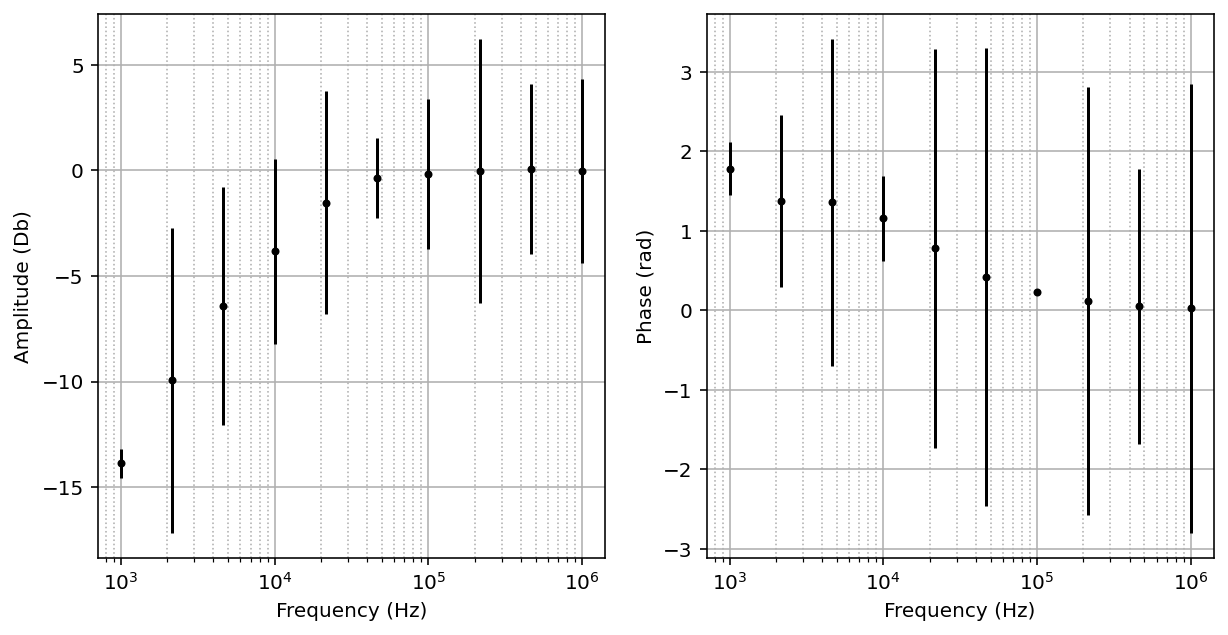

In [2]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.errorbar(s,10*np.log10(abs(H_toymodel)),10*np.log10(abs(H_toymodel_error)),fmt='.',color='k')
ax1.semilogx()
ax1.grid()
ax1.grid(which='minor',linestyle=':')
ax2.grid()
ax2.grid(which='minor',linestyle=':')
ax2.errorbar(s,np.angle(H_toymodel),np.angle(H_toymodel_error),fmt='.',color='k')
ax2.semilogx()

ax1.set_xlabel('Frequency (Hz)')
ax2.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Amplitude (Db)')
ax2.set_ylabel('Phase (rad)')

In [3]:
import lmfit

class HighPass(lmfit.model.Model):
    __doc__ = 'High-pass filter model' + lmfit.models.COMMON_INIT_DOC
    
    def __init__(self, *args, **kwargs):
        super().__init__(H, *args, **kwargs)
        
    
model = HighPass()


par = model.make_params(R=1e3, C=1e-9)

In [4]:
fit = model.fit(H_toymodel, params=par, s=s, weights = 1/H_toymodel_error, verbose=True)
print(fit.fit_report())
fit.params.pretty_print()

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 28
    # data points      = 20
    # variables        = 2
    chi-square         = 3.6247e-04
    reduced chi-square = 2.0137e-05
    Akaike info crit   = -214.365916
    Bayesian info crit = -212.374452
[[Variables]]
    R: -14101.7903 +/- 1.9244e+10 (136464797.14%) (init = 1000)
    C: -3.3770e-09 +/- 0.00460221 (136282912.89%) (init = 1e-09)
[[Correlations]] (unreported correlations are < 0.100)
    C(R, C) = -1.000
Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
C  -3.377e-09     -inf      inf 0.004602     True     None     None
R  -1.41e+04     -inf      inf 1.924e+10     True     None     None


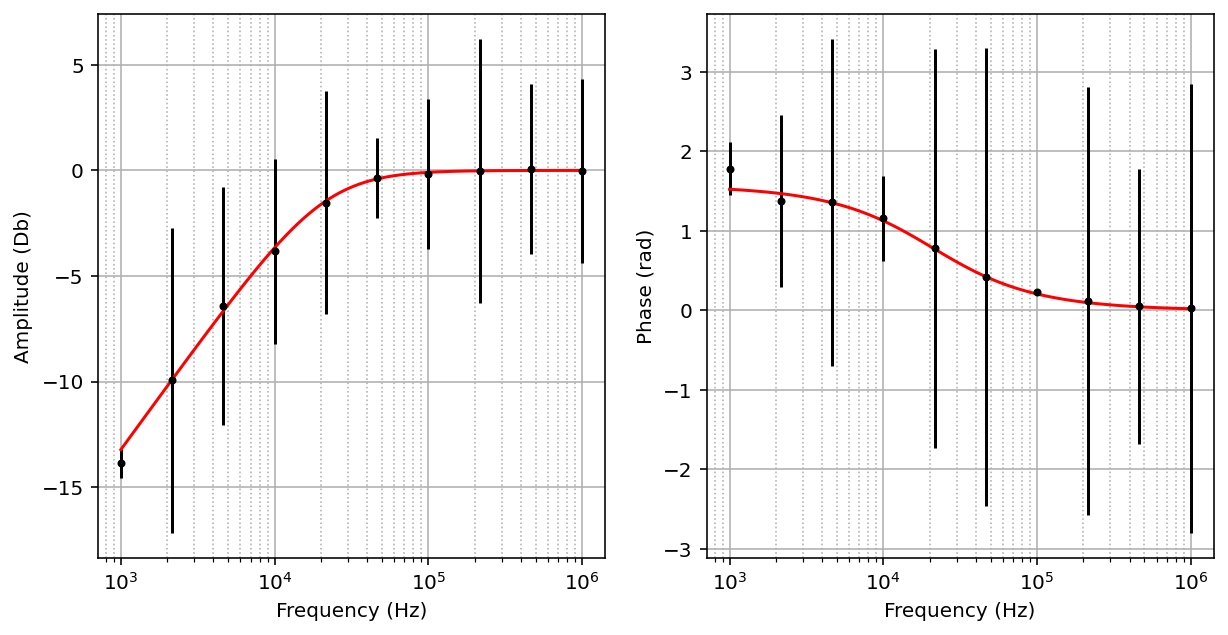

In [5]:
fit_model = model.eval(params=fit.params, s=s1)

ax1.plot(s1, 10*np.log10(np.abs(fit_model)), color='r')
ax2.plot(s1, np.angle(fit_model), color='r')
fig

In [ ]:
# c = cost.LeastSquares(s,H_toymodel,H_toymodel_error,model=H)
# 
# m1 = Minuit(c, R=1e-3, C=1e-6)
# m1.migrad()
# 
# ax1.plot(c.x, 10*np.log10(np.abs(H(c.x, *m1.values))),color='r')
# ax2.plot(c.x, np.angle(H(c.x, *m1.values)),color='r')
# 
# fig

In [6]:
1/(fit.params['C']*fit.params['R'])

20999.084234230748